# Handwriting Classifier to classify different digits(0-9) by taking an image as an input. The MNIST dataset was used to train the model.

Importing the libraries

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

from google.colab import files
from keras.preprocessing import image

Creating the Callback class

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

Importing the MNIST dataset

In [4]:
mnist= tf.keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Looking at the received data

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

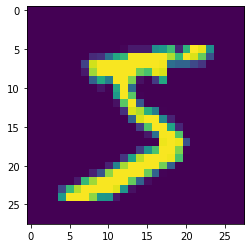

In [5]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
print(train_images[0])
print(train_labels[0])
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

Splitting dataset into training and validation sets

In [0]:
train_images = np.expand_dims(train_images,axis=3)
test_images = np.expand_dims(test_images,axis=3)

Image Processing

In [7]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
	 rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(rescale = 1./255)

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


Training the CNN model

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(train_datagen.flow(train_images, train_labels, batch_size=32),
                              validation_data=validation_datagen.flow(test_images, test_labels, batch_size=32),
                              epochs=15, steps_per_epoch = 100, validation_steps=100 , callbacks=[callbacks], verbose = 1)

model.evaluate(test_images, test_labels, verbose=0)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
100/100 [==============================] - 8s 80ms/step - loss: 1.9621 - accuracy: 0.3156 - val_loss: 0.8602 - val_accuracy: 0.7759
Epoch 2/15
100/100 [==============================] - 8s 79ms/step - loss: 1.4316 - accuracy: 0.5106 - val_loss: 0.5643 - val_accuracy: 0.8266
Epoch 3/15
100/100 [==============================] - 8s 78ms/step - loss: 1.1764 - accuracy: 0.6031 - val_loss: 0.3797 - val_accuracy: 0.8953
Epoch 4/15
100/100 [==============================] - 8s 77ms/step - loss: 1.0514 - accuracy: 0.6575 - val_loss: 0.4421 - val_accuracy: 0.8813
Epoch 5/15
100/100 [==============================] - 8s 76ms/step - loss: 0.8873 - accuracy: 0.7094 - val_loss: 0.2920 - val_accuracy: 0.9175
Epoch 6/15
100/100 [==============================] - 8s 77ms/step - loss: 0.7700 - accuracy: 0.7506 - val_loss: 0.1941 - val_accuracy: 0.9425
Epoch 7/15
100/100 [==============================] - 8s 77ms/step

[1256.23828125, 0.26989999413490295]

Summary

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               8

Looking at the results

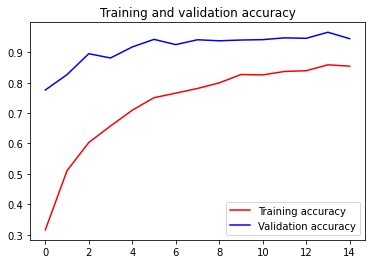

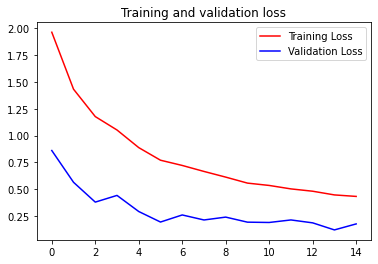

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

User test: Upload file(image) from system

In [12]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(28,28))
  x = image.img_to_array(img)
  x=np.asarray(x)
  rgb_weights = [0.2989, 0.5870, 0.1140]
  x = np.dot(x, rgb_weights)
  x = ((x*-1)+255)
  #plt.imshow(x)
  x = x/255.
  x = np.expand_dims(x, axis=2)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  #print(images.shape)

  classes = model.predict(images)
  #print(classes)
  ans = np.where(classes[0] == np.amax(classes[0],axis=0))
  print('The digit is:',*ans[0])
  #print(images)


Saving 6.jpeg to 6 (1).jpeg
Saving 7.png to 7.png
Saving 4.jpg to 4.jpg
Saving 2.jpg to 2.jpg
The digit is: 6
The digit is: 7
The digit is: 4
The digit is: 2


Clean Up

In [0]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)